In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plorts
plt.style.use(['plorts', 'plorts-web'])

In [3]:
def calculate_load(m, assignment):
    load = np.zeros(m)
    for assn in assignment:
        load[assn] += 1
    return load

In [4]:
T = 2*num_flows

num_links = 30
flows_per_link = 1

num_flows = num_links * flows_per_link

assignment = np.random.randint(0, num_links, size=num_flows)
df = []
for t in range(T):
    load = calculate_load(num_links, assignment)
    for link,link_load in enumerate(load):
        if link_load > flows_per_link:
            # re-randomize each flow in link
            for flow in range(num_flows):
                if assignment[flow] == link:
                    assignment[flow] = np.random.randint(0, num_links)
                    link_load -= 1
                    if link_load <= limit: break
                        
    for link,link_load in enumerate(load):
        df.append({
            'time': t,
            'link': link,
            'num_flows': sum([1 if l == link else 0 for l in assignment])
        })
df = pd.DataFrame(df)

NameError: name 'num_flows' is not defined

In [ ]:
plorts.plot(df, x='time', y='num_flows', hue='link')

In [5]:
num_links = 10
flows_per_link = 1

df = []
def time_to_balance(num_links, num_flows, limit, only_excess=True):
#    num_flows = int(np.floor(num_links * flows_per_link))

    assignment = np.random.randint(0, num_links, size=num_flows)

    t = 0
    while True:
        t += 1
        
        load = calculate_load(num_links, assignment)
        if max(load) <= flows_per_link:
            return t
        
        for link,link_load in enumerate(load):
            if link_load > limit:
                # re-randomize each flow in link
                for flow in range(num_flows):
                    if assignment[flow] == link:
                        assignment[flow] = np.random.randint(0, num_links)
                        if only_excess:
                            link_load -= 1
                            if link_load <= limit: break

time_to_balance(num_links, num_links, 1)

6

In [6]:
df = []
for num_links in [10]:
    for only_excess in [False]:
        for num_flows in range(0, num_links+1):
            print(num_flows)
            if num_flows > num_links: break
            for _ in range(100):
                df.append({
                    'num_links': num_links,
                    'num_flows': num_flows,
                    'flows_per_link': 1.0*num_flows/num_links,
                    'only_excess': only_excess,
                    'runtime': time_to_balance(num_links, num_flows, limit=1, only_excess=only_excess)
                })
#df = pd.DataFrame(df)    
#df

0
1
2
3
4
5
6
7
8
9
10


In [7]:
for num_links in [10,50]:
    for only_excess in [True]:
        for num_flows in range(0, num_links+1):
            print(num_flows)
            if num_flows > num_links: break
            for _ in range(100):
                df.append({
                    'num_links': num_links,
                    'num_flows': num_flows,
                    'flows_per_link': 1.0*num_flows/num_links,
                    'only_excess': only_excess,
                    'runtime': time_to_balance(num_links, num_flows, limit=1, only_excess=only_excess)
                })

0
1
2
3
4
5
6
7
8
9
10
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


In [8]:
df = pd.DataFrame(df)    
df

,num_links,num_flows,flows_per_link,only_excess,runtime
0,10,0,0.0,False,1
1,10,0,0.0,False,1
2,10,0,0.0,False,1
3,10,0,0.0,False,1
4,10,0,0.0,False,1
...,...,...,...,...,...
7295,50,50,1.0,True,104
7296,50,50,1.0,True,69
7297,50,50,1.0,True,64
7298,50,50,1.0,True,93


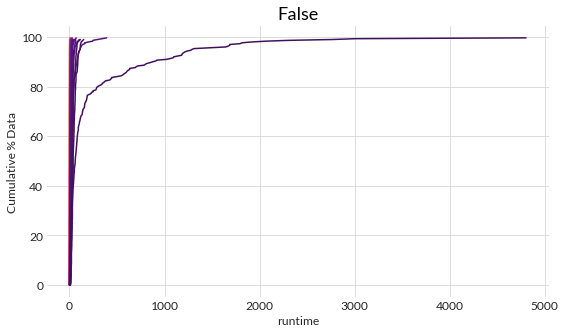

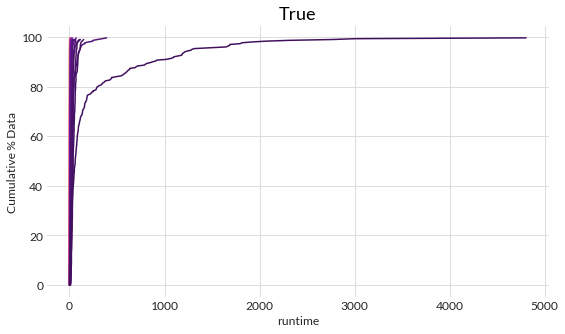

In [9]:
for only_excess, edf in df.groupby('only_excess'):
    plt.figure()
    plt.title(only_excess)
    plorts.cdf(df, x='runtime', hue='flows_per_link')

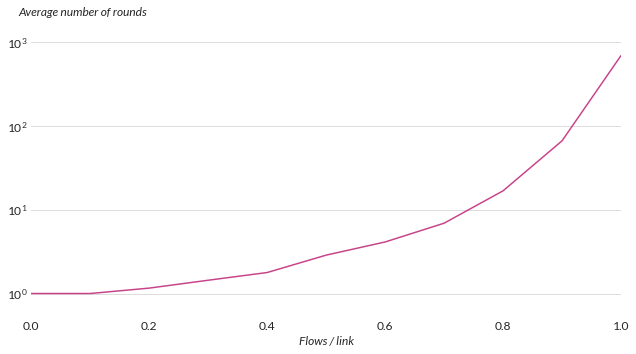

In [14]:
plorts.plot(df[~df.only_excess].groupby(['flows_per_link', 'only_excess'], as_index=False).mean(),
               x='flows_per_link', y='runtime', hue='only_excess')
plt.xlabel("Flows / link")
plt.ylabel("Average number of rounds")
plt.yscale('log')
plorts.style_axis()
plt.savefig("sim_10_all.png")

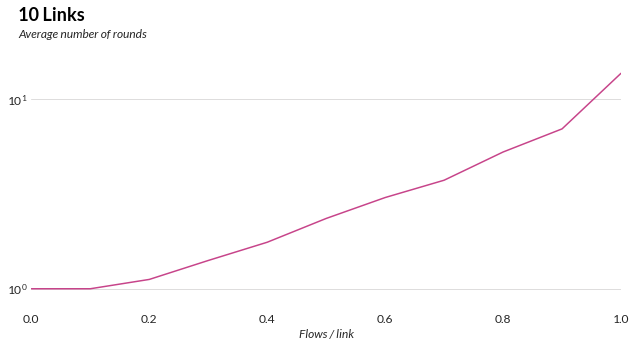

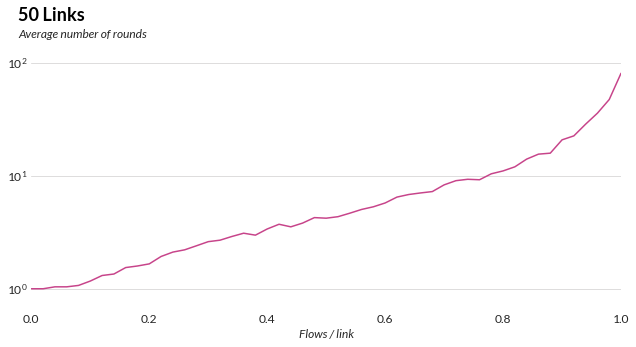

In [16]:
for num_links,edf in df.groupby('num_links'):
    plt.figure()
    plt.title(f"{num_links} Links")
    plorts.plot(edf[edf.only_excess].groupby(['flows_per_link', 'only_excess'], as_index=False).mean(),
                   x='flows_per_link', y='runtime', hue='only_excess')
    plt.xlabel("Flows / link")
    plt.ylabel("Average number of rounds")
    plt.yscale('log')
    plorts.style_axis()
    plt.savefig(f"sim_{num_links}_only_excess.png")